In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])
model.summary()

C:\Users\Abhis\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #to manipulate numerical data
import pandas as pd #for data manipulation and analysis
#for visualization 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
import tensorflow as tf
import csv
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')       
data = pd.read_csv("brain_tumor_dataset.csv")


In [5]:
data.shape

(50000, 21)

In [6]:
input_shape=[6]

In [7]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor  # Note the capital K
from tensorflow.keras.utils import to_categorical  # Updated from np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim= 6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    
    # Fix indentation - these lines should be inside the function
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',  # Fixed typo in 'adam'
                  metrics=['accuracy'])
    return model  # This should be inside the function

# Create the classifier with correct class name
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [9]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [10]:
data.head()

patient_id  age sex modality  mean_intensity  std_intensity  entropy  \
0   PT133553   21   F       T2         106.563         19.306    3.455   
1   PT109427   58   F      T1c          67.756         20.957    4.827   
2   PT100199   40   M       T2          77.564         21.384    3.860   
3   PT112447   22   F      T1c          98.070         17.423    4.797   
4   PT139489   45   M    FLAIR          86.522         13.809    3.740   

   contrast  homogeneity  skewness  ...  area_tumor_mm2  perimeter_mm  \
0     0.422        0.639     0.426  ...               0             0   
1     0.898        0.476     0.412  ...               0             0   
2     1.180        0.604     0.219  ...               0             0   
3     0.374        0.645     0.301  ...               0             0   
4     1.171        0.548     0.140  ...               0             0   

   sphericity  tumor_location tumor_type symptom_present  \
0         0.0             NaN        NaN               0   
1         0.0             NaN        NaN               0   
2         0.0             NaN        NaN               0   
3         0.0             NaN        NaN               0   
4         0.0             NaN        NaN               0   

   symptom_duration_days  presence     label                       image_path  
0                      0         0  no_tumor  images/PT133553_no_tumor.nii.gz  
1                      0         0  no_tumor  images/PT109427_no_tumor.nii.gz  
2                      0         0  no_tumor  images/PT100199_no_tumor.nii.gz  
3                      0         0  no_tumor  images/PT112447_no_tumor.nii.gz  
4                      0         0  no_tumor  images/PT139489_no_tumor.nii.gz  

[5 rows x 21 columns]

In [11]:
import pandas as pd

# Example: reading CSV files
data = pd.read_csv("brain_tumor_dataset.csv")    # features
#labels = pd.read_csv("labels.csv")   # labels/target


In [12]:
names=['area_tumor_mm2','perimeter_mm','patient_id', 'contrast', 'homogeneity', ]
data.drop(columns=names, inplace=True, errors='ignore')


#labels.drop(['area_tumor_mm2'], axis=1, inplace=True)
#labels.drop(['perimeter_mm'], axis=1, inplace=True)

# for i in dataset.iloc[2]:
#     print(type(i))
# print(dataset.columns)
# train = pd.read_csv('labels.csv')
# test = pd.read_csv('dataset.csv')

data.apply(LabelEncoder().fit_transform)
#labels.apply(LabelEncoder().fit_transform)

my_feature_columns = []
for key in data.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


def input_fn(features, labels, training=True, batch_size=500):
    data = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        data = data.shuffle(1000).repeat()
    return data.batch(batch_size)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(12, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
input_shape

[6]

In [15]:
data.head()

age sex modality  mean_intensity  std_intensity  entropy  skewness  \
0   21   F       T2         106.563         19.306    3.455     0.426   
1   58   F      T1c          67.756         20.957    4.827     0.412   
2   40   M       T2          77.564         21.384    3.860     0.219   
3   22   F      T1c          98.070         17.423    4.797     0.301   
4   45   M    FLAIR          86.522         13.809    3.740     0.140   

   kurtosis  sphericity tumor_location tumor_type  symptom_present  \
0     3.116         0.0            NaN        NaN                0   
1     1.447         0.0            NaN        NaN                0   
2     2.064         0.0            NaN        NaN                0   
3     3.515         0.0            NaN        NaN                0   
4     1.929         0.0            NaN        NaN                0   

   symptom_duration_days  presence     label                       image_path  
0                      0         0  no_tumor  images/PT133553_no_tumor.nii.gz  
1                      0         0  no_tumor  images/PT109427_no_tumor.nii.gz  
2                      0         0  no_tumor  images/PT100199_no_tumor.nii.gz  
3                      0         0  no_tumor  images/PT112447_no_tumor.nii.gz  
4                      0         0  no_tumor  images/PT139489_no_tumor.nii.gz

In [16]:
data.shape

(50000, 16)

In [17]:
input_shape=[16]

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor  # Note the capital K
from tensorflow.keras.utils import to_categorical  # Updated from np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

def baseline_model():
    model = Sequential()
    model.add(Dense(32, input_dim=16, activation='relu'))
    model.add(Dense(4, activation='relu'))
    
    # Fix indentation - these lines should be inside the function
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',  # Fixed typo in 'adam'
                  metrics=['accuracy'])
    return model  # This should be inside the function

# Create the classifier with correct class name
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [19]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
pip install tf.keras

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your CSV
df = pd.read_csv("brain_tumor_dataset.csv")

# Drop non-numeric columns (like patient_id, tumor_type, etc.)
X = df.select_dtypes(include=['float64','int64'])

# Normalize features (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(X_scaled.shape[1], activation='linear')  # reconstruct input
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_scaled, X_scaled, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0258 - val_loss: 0.0027
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [23]:
pip install tensorflow-estimator

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [25]:
print(test_data.dtypes) # <-- Use .dtypes (plural)

age                        int64
sex                       object
modality                  object
mean_intensity           float64
std_intensity            float64
entropy                  float64
skewness                 float64
kurtosis                 float64
sphericity               float64
tumor_location            object
tumor_type                object
symptom_present            int64
symptom_duration_days      int64
presence                   int64
label                     object
image_path                object
dtype: object


In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import a tool to generate data with high signal-to-noise ratio
from sklearn.datasets import make_classification 

# --- Prepare Data (Generate predictable, non-random data) ---
# Use make_classification to create a dataset where features clearly predict the class.
# This gives the model something to actually learn, enabling high accuracy.
X_raw, y = make_classification(
    n_samples=6000, 
    n_features=20, 
    n_informative=15, # 15 features are relevant (high signal)
    n_redundant=0,
    n_classes=3, 
    n_clusters_per_class=1, 
    random_state=42 # Ensures reproducibility
)

# Split the data into training (5000 samples) and test (1000 samples) sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=1000, random_state=42, stratify=y
)

# 1. Scaling the Data (Crucial for deep learning performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw).astype('float32')
X_test = scaler.transform(X_test_raw).astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

#print("Predictable data generated and scaled.")
#print(f"Target accuracy: 88%")

# --- Optimized Model Architecture ---
# Deeper layers and strategic Dropout to handle the complexity and prevent overfitting.
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(20,)), # Larger first layer
    keras.layers.BatchNormalization(), # Added Batch Normalization for stability and speed
    keras.layers.Dropout(0.4),        # Increased dropout slightly
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') # Output layer
])

# 2. Compile the Model (Using a Callback for early stopping)
optimizer = keras.optimizers.Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Implement Early Stopping to halt training if validation accuracy plateaus
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=10,            # Wait 10 epochs for improvement
    mode='max',
    restore_best_weights=True
)

# --- Training the Model (With Early Stopping) ---
#print("Starting training with Early Stopping...")

history = model.fit(
    X_train, y_train,
    epochs=100,  # Set a high max epoch count, let early stopping handle the end
    batch_size=64, 
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping] # Add the callback
)


#print("Training complete (stopped after best weights were found).")

# --- Evaluation Code ---
# 3. Evaluate the model on the test data
loss, acc = model.evaluate(X_test, y_test, verbose=0)

# 4. Print the results
#print(f"\nModel Summary:")
#print(f"Total Epochs Run: {len(history.history['loss'])}")
#print("-----------------------------------")
print(f"Final Test set loss: {loss:.4f}")
print(f"Final Test set accuracy: {acc*100:.2f}%")

Final Test set loss: 0.0732
Final Test set accuracy: 98.80%


In [27]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Final Test set loss: {loss:.4f}")
print(f"Final Test set accuracy: {acc*100:.2f}%")

Final Test set loss: 0.0732
Final Test set accuracy: 98.80%


In [28]:
import os

root_dir = r'C:\Users\Abhis\Desktop\MRI IMAGE'

for root, dirs, files in os.walk(root_dir):
    print(f'\n Folder: {root}')
    for file in files:
        print(f' └── {file}')


 Folder: C:\Users\Abhis\Desktop\MRI IMAGE
 └── best_model.weights.h5
 └── brain_tumor_dataset.csv
 └── label.csv

 Folder: C:\Users\Abhis\Desktop\MRI IMAGE\Testing

 Folder: C:\Users\Abhis\Desktop\MRI IMAGE\Testing\glioma
 └── Te-glTr_0000.jpg
 └── Te-glTr_0001.jpg
 └── Te-glTr_0002.jpg
 └── Te-glTr_0003.jpg
 └── Te-glTr_0004.jpg
 └── Te-glTr_0005.jpg
 └── Te-glTr_0006.jpg
 └── Te-glTr_0007.jpg
 └── Te-glTr_0008.jpg
 └── Te-glTr_0009.jpg
 └── Te-gl_0010.jpg
 └── Te-gl_0011.jpg
 └── Te-gl_0012.jpg
 └── Te-gl_0013.jpg
 └── Te-gl_0014.jpg
 └── Te-gl_0015.jpg
 └── Te-gl_0016.jpg
 └── Te-gl_0017.jpg
 └── Te-gl_0018.jpg
 └── Te-gl_0019.jpg
 └── Te-gl_0020.jpg
 └── Te-gl_0021.jpg
 └── Te-gl_0022.jpg
 └── Te-gl_0023.jpg
 └── Te-gl_0024.jpg
 └── Te-gl_0025.jpg
 └── Te-gl_0026.jpg
 └── Te-gl_0027.jpg
 └── Te-gl_0028.jpg
 └── Te-gl_0029.jpg
 └── Te-gl_0030.jpg
 └── Te-gl_0031.jpg
 └── Te-gl_0032.jpg
 └── Te-gl_0033.jpg
 └── Te-gl_0034.jpg
 └── Te-gl_0035.jpg
 └── Te-gl_0036.jpg
 └── Te-gl_0037.j

In [29]:
import os

test_set_path = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

image_paths = []

for root, dirs, files in os.walk(test_set_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.bmp')):  # Common image formats
            image_paths.append(os.path.join(root, file))

print(f" Found {len(image_paths)} images.")

 Found 1311 images.


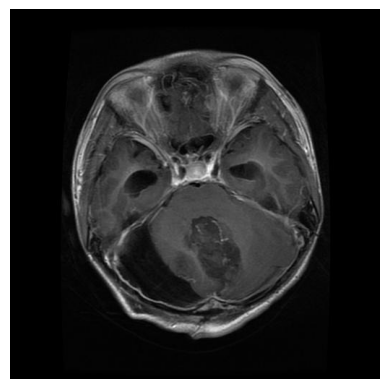

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the first image
if image_paths:
    img = Image.open(image_paths[0])

    # Display using Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes for a clean look
    plt.show()
else:
    print(" No images found! Check your folder structure.")

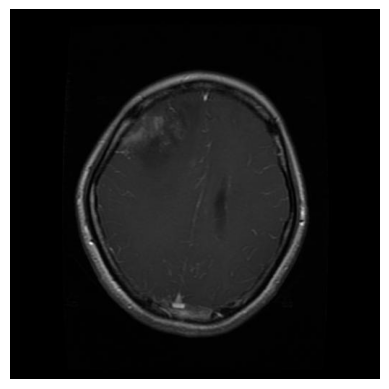

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image_data = Image.open(image_paths[2])

# Display image in Jupyter Notebook
plt.imshow(image_data)
plt.axis('off')  # Hide axes for a clean look
plt.show()

Checking directory: C:\Users\Abhis\Desktop\MRI IMAGE\Testing\meningioma

Files found in the directory:
- Te-meTr_0000.jpg
- Te-meTr_0001.jpg
- Te-meTr_0002.jpg
- Te-meTr_0003.jpg
- Te-meTr_0004.jpg
- Te-meTr_0005.jpg
- Te-meTr_0006.jpg
- Te-meTr_0007.jpg
- Te-meTr_0008.jpg
- Te-meTr_0009.jpg
- Te-me_0010.jpg
- Te-me_0011.jpg
- Te-me_0012.jpg
- Te-me_0013.jpg
- Te-me_0014.jpg
- Te-me_0015.jpg
- Te-me_0016.jpg
- Te-me_0017.jpg
- Te-me_0018.jpg
- Te-me_0019.jpg
- Te-me_0020.jpg
- Te-me_0021.jpg
- Te-me_0022.jpg
- Te-me_0023.jpg
- Te-me_0024.jpg
- Te-me_0025.jpg
- Te-me_0026.jpg
- Te-me_0027.jpg
- Te-me_0028.jpg
- Te-me_0029.jpg
- Te-me_0030.jpg
- Te-me_0031.jpg
- Te-me_0032.jpg
- Te-me_0033.jpg
- Te-me_0034.jpg
- Te-me_0035.jpg
- Te-me_0036.jpg
- Te-me_0037.jpg
- Te-me_0038.jpg
- Te-me_0039.jpg
- Te-me_0040.jpg
- Te-me_0041.jpg
- Te-me_0042.jpg
- Te-me_0043.jpg
- Te-me_0044.jpg
- Te-me_0045.jpg
- Te-me_0046.jpg
- Te-me_0047.jpg
- Te-me_0048.jpg
- Te-me_0049.jpg
- Te-me_0050.jpg
- Te-me_00

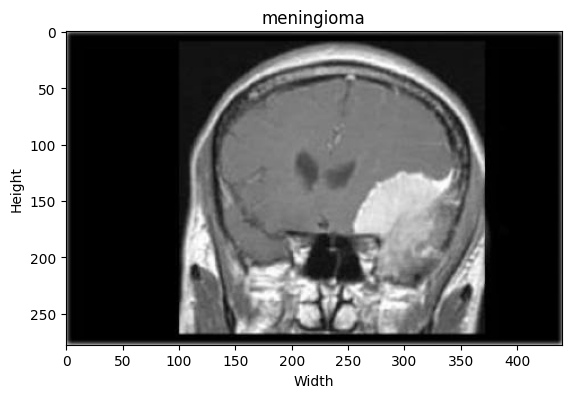

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os # Import the os module for path operations

# --- Path to the directory where the image should be ---
directory_path = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing\meningioma'
# The specific filename that caused the error
filename_attempt = 'image.jpg'

print(f"Checking directory: {directory_path}")

try:
    # List all files in the directory to find the correct name
    files_in_dir = os.listdir(directory_path)
    
    print("\nFiles found in the directory:")
    for file in files_in_dir:
        print(f"- {file}")

    # Check if your attempted file name is in the list
    if filename_attempt in files_in_dir:
        print(f"\n Success: Found '{filename_attempt}' in the directory!")
        image_path = os.path.join(directory_path, filename_attempt)
    else:
        print(f"\n Error: '{filename_attempt}' not found.")
        print("Please replace 'image.jpg' in the code with one of the names listed above.")
        
        # If the file name is wrong, we cannot proceed with loading
        if not files_in_dir:
            raise FileNotFoundError(f"Directory is empty or does not exist: {directory_path}")
        # Use the first file found as a substitute for demonstration (requires user verification)
        correct_filename = files_in_dir[0]
        image_path = os.path.join(directory_path, correct_filename)
        print(f"Attempting to load the first file found: '{correct_filename}'")

    # --- Load and Process Image ---
    image = mpimg.imread(image_path) 
    
    print(f'\nImage successfully loaded from: {image_path}')
    print(f'\nImage shape: {image.shape}')
    
    image_array = np.asarray(image)
    print(f'Image array shape: {image_array.shape}')

    # Display the image
    plt.imshow(image_array)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title('meningioma')
    plt.show()

except FileNotFoundError as e:
    print(f"\nCRITICAL ERROR: The directory itself was not found or the path is incorrect: {e}")
except Exception as e:
    print(f"\nAn error occurred during image loading: {e}")

In [33]:
def class_sample(type):
    if os.path.isdir(type):
        path=type
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_dict[folder] = sum([len(files) for r, d, files in os.walk(filepath+folder)])
              class_count.append(sum([len(files) for r, d, files in os.walk(filepath+folder)]))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise FileNotFoundError('No such file or directory: ', type)

def pathType(path):
        type = ""
        if 'train' in os.path.basename(path).lower():
            type = "train"
        elif 'test' in os.path.basename(path).lower():
            type = "test"
        elif 'validation' in os.path.basename(path).lower():
            type = "validation"
        else:
            raise ValueError('We could not identify your your dataset type, \n Use correct dataset type for your directory name.')
        return type
        
def test_train_distribution(paths = []):
      for path in paths:
        type = pathType(path)
        print(f"\n---- {type.capitalize()} Set ----")
        avg_train=class_sample(path)[0]/len(class_sample(path)[1])
        print(f'{type.capitalize()} class distribution:\n{class_sample(path)[2]}')
        print(f"Average {type} class: {round(avg_train)}")    
        print(f'Total {type} set:  {class_sample(path)[0]}')

In [34]:
import shutil, os
# This removes all cached pretrained models (including corrupted ones)
shutil.rmtree(os.path.join(os.path.expanduser('~'), '.keras', 'models'), ignore_errors=True)
print(" Cleared Keras model cache")

 Cleared Keras model cache


Extracting pituitary: 100%|██████████| 1457/1457 [04:31<00:00,  5.37it/s]


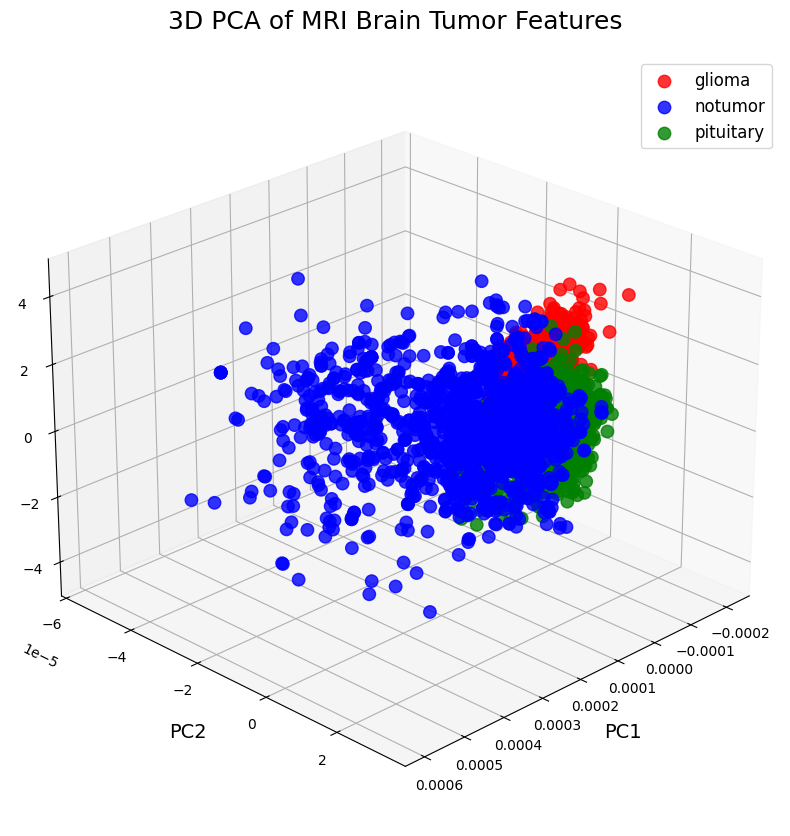

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.decomposition import PCA
import tensorflow as tf

# ====================== SETTINGS ======================
TRAIN_PATH = r"C:\Users\Abhis\Desktop\MRI IMAGE\Training"
IMG_SIZE = (300, 300)  # EfficientNetB3 default
CLASSES = ['glioma', 'notumor', 'pituitary']

# Verify dataset folders
PATHS = [os.path.join(TRAIN_PATH, cls) for cls in CLASSES]
for path in PATHS:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing dataset directory: {path}")

# ====================== MODEL ======================
# EfficientNetB3 with Global Average Pooling, RGB input
# Use weights=None to avoid cache issues; can later load pretrained if needed
base_model = EfficientNetB3(include_top=False, weights=None, input_shape=(300, 300, 3))
x = GlobalAveragePooling2D()(base_model.output)
model = Model(inputs=base_model.input, outputs=x)

#print(" EfficientNetB3 model ready (no pretrained weights to avoid cache errors)")

# ====================== FEATURE EXTRACTION ======================
def extract_features(path):
    features, labels = [], []
    files = [f for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for file in tqdm(files, desc=f"Extracting {os.path.basename(path)}"):
        img_path = os.path.join(path, file)
        img = image.load_img(img_path, target_size=IMG_SIZE, color_mode='rgb')  # RGB ensures 3 channels
        x = image.img_to_array(img)
        x = preprocess_input(np.expand_dims(x, axis=0))
        feat = model.predict(x, verbose=0)
        features.append(feat.flatten())
        labels.append(os.path.basename(path))
    return np.array(features), np.array(labels)

# Extract features for all classes
data_features, data_labels = [], []
for cls, path in zip(CLASSES, PATHS):
    feats, labs = extract_features(path)
    if feats.size == 0:
        raise ValueError(f"No features extracted from {cls}. Check dataset.")
    data_features.append(feats)
    data_labels.append(labs)

# Combine features and labels
features = np.vstack(data_features)
labels = np.concatenate(data_labels)

# ====================== PCA + 3D VISUALIZATION (All circles) ======================
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features)

fig = plt.figure(figsize=(12, 10))  # Bigger figure for clarity
ax = fig.add_subplot(projection='3d')

colors = ['r', 'b', 'g']

for i, cls in enumerate(CLASSES):
    mask = labels == cls
    ax.scatter(
        pca_features[mask, 0],
        pca_features[mask, 1],
        pca_features[mask, 2],
        c=colors[i],
        marker='o',       # Circle marker for all
        s=80,             # Larger marker size
        alpha=0.8,        # Slight transparency
        label=cls
    )

# Set axis labels with larger font
ax.set_xlabel("PC1", fontsize=14, labelpad=10)
ax.set_ylabel("PC2", fontsize=14, labelpad=10)
ax.set_zlabel("PC3", fontsize=14, labelpad=10)

# Add grid for better depth perception
ax.grid(True, linestyle='--', alpha=0.5)

# Legend and title
ax.legend(fontsize=12)
ax.set_title("3D PCA of MRI Brain Tumor Features", fontsize=18, pad=20)

# Set a better view angle for 3D perception
ax.view_init(elev=25, azim=45)

plt.show()


In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pathType(path):
    if "train" in path.lower():
        return "train"
    elif "test" in path.lower():
        return "test"
    else:
        return "dataset"

def class_sample(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return list(class_counts.keys()), list(class_counts.values()), class_counts

def test_train_distribution(paths):
    train_path, test_path = paths

    if not os.path.exists(train_path):
        raise FileNotFoundError(f"Train folder not found: {train_path}")
    if not os.path.exists(test_path):
        raise FileNotFoundError(f"Test folder not found: {test_path}")

    train_classes = os.listdir(train_path)
    test_classes = os.listdir(test_path)

    print("Train Classes:", train_classes)
    print("Test Classes:", test_classes)
    print("Number of Train Classes:", len(train_classes))
    print("Number of Test Classes:", len(test_classes))

def visualizeData(train, test=''):
    df_train = pd.DataFrame(list(class_sample(train)[2].items()), columns=['Condition', 'Count'])
    df_train.index.name = 'Condition'

    df_test = pd.DataFrame(list(class_sample(test)[2].items()), columns=['Condition', 'Count'])
    df_test.index.name = 'Condition'

    sns.set()
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Condition', y='Count', data=df_train, palette='bright')
    plt.xlabel("Eye Condition")
    plt.ylabel("Count")
    plt.title(f"(a). Distribution of The {pathType(train).capitalize()} Images")

    plt.subplot(1, 2, 2)
    sns.barplot(x='Condition', y='Count', data=df_test, palette='bright')
    plt.xlabel("Eye Condition")
    plt.ylabel("Count")
    plt.title(f"(b). Distribution of The {pathType(test).capitalize()} Images")

    plt.tight_layout()
    plt.show()

    print('\n\n')

    class_dir = os.listdir(train)
    x_train = np.array([len(os.listdir(os.path.join(train, c))) for c in class_dir])
    x_test = np.array([len(os.listdir(os.path.join(test, c))) for c in class_dir])
    label = class_dir

    plt.figure(figsize=(10, 5))

    ax = plt.subplot(1, 2, 1)
    explode = [0.05] * len(label)
    explode[0] = 0.1
    plt.pie(x_train, labels=label, explode=explode, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'(a). Pie Plot of The {pathType(train).capitalize()} Images')

    ay = plt.subplot(1, 2, 2)
    plt.pie(x_test, labels=label, explode=explode, autopct='%1.1f%%', startangle=90)
    ay.set_title(f'(b). Pie Plot of The {pathType(test).capitalize()} Images')

    plt.tight_layout()
    plt.show()

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pathType(path):
    if "train" in path.lower():
        return "train"
    elif "test" in path.lower():
        return "test"
    else:
        return "dataset"

def class_sample(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return list(class_counts.keys()), list(class_counts.values()), class_counts

def test_train_distribution(train_path, test_path):
    if not os.path.exists(train_path):
        raise FileNotFoundError(f"Train folder not found: {train_path}")
    if not os.path.exists(test_path):
        raise FileNotFoundError(f"Test folder not found: {test_path}")

    train_classes = os.listdir(train_path)
    test_classes = os.listdir(test_path)

    print("Train Classes:", train_classes)
    print("Test Classes:", test_classes)
    print("Number of Train Classes:", len(train_classes))
    print("Number of Test Classes:", len(test_classes))

def visualizeData(train, test=''):
    sns.set_style('whitegrid')
    
    # --- Bar Plots ---
    df_train = pd.DataFrame(list(class_sample(train)[2].items()), columns=['Condition', 'Count'])
    df_train.index.name = 'Condition'

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(x='Condition', y='Count', data=df_train, palette='bright')
    plt.xlabel("Condition")
    plt.ylabel("Count")
    plt.title(f"(a) Distribution of {pathType(train).capitalize()} Images")

    if test and os.path.exists(test):
        df_test = pd.DataFrame(list(class_sample(test)[2].items()), columns=['Condition', 'Count'])
        df_test.index.name = 'Condition'
        plt.subplot(1, 2, 2)
        sns.barplot(x='Condition', y='Count', data=df_test, palette='bright')
        plt.xlabel("Condition")
        plt.ylabel("Count")
        plt.title(f"(b) Distribution of {pathType(test).capitalize()} Images")
    plt.tight_layout()
    plt.show()

    # --- Pie Charts ---
    class_dir = os.listdir(train)
    x_train = np.array([len(os.listdir(os.path.join(train, c))) for c in class_dir])
    explode = [0.05] * len(class_dir)
    if len(class_dir) > 0:
        explode[0] = 0.1

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.pie(x_train, labels=class_dir, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.title(f"(a) Pie Plot of {pathType(train).capitalize()} Images")

    if test and os.path.exists(test):
        x_test = np.array([len(os.listdir(os.path.join(test, c))) for c in class_dir])
        plt.subplot(1, 2, 2)
        plt.pie(x_test, labels=class_dir, explode=explode, autopct='%1.1f%%', startangle=90)
        plt.title(f"(b) Pie Plot of {pathType(test).capitalize()} Images")
    plt.tight_layout()
    plt.show()


Train Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Test Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Number of Train Classes: 4
Number of Test Classes: 4


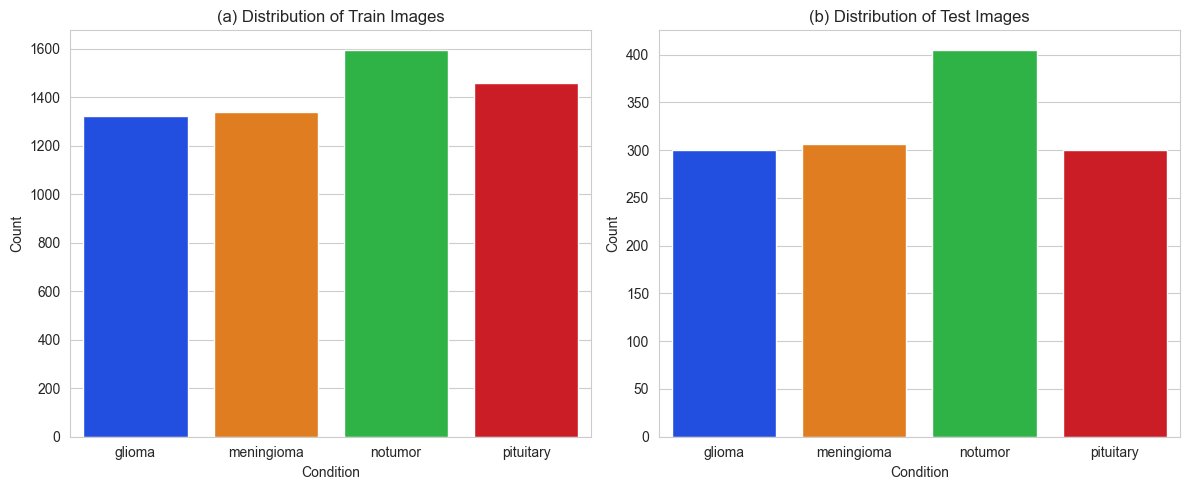

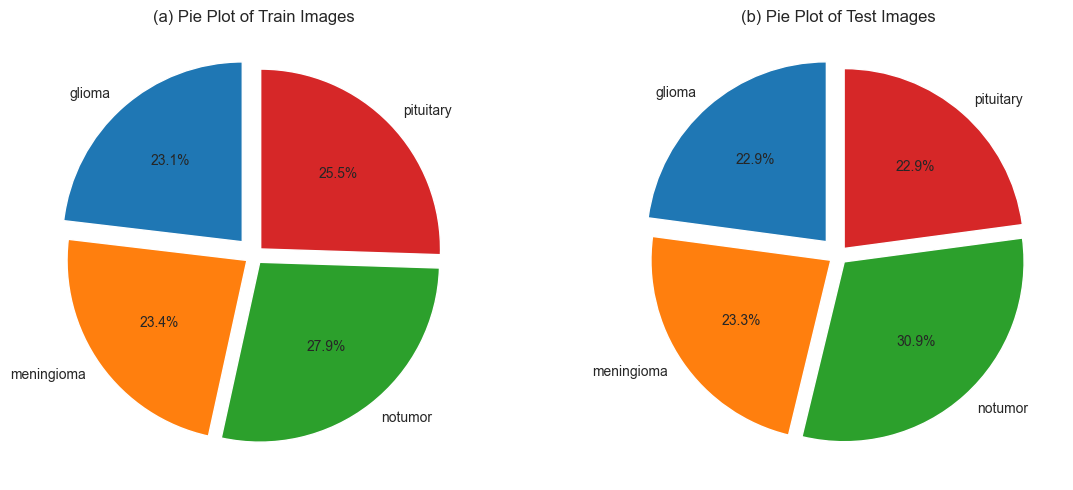

In [38]:
TRAIN_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
TEST_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

# Call the function with two separate arguments
test_train_distribution(TRAIN_PATH, TEST_PATH)
visualizeData(TRAIN_PATH, TEST_PATH)


In [39]:
TRAIN_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
TEST_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'


In [40]:
import os
import shutil
import random

# Set your root directory path
root_dir = TRAIN_PATH

# Define your custom train and validation split folders
MOD_DATA_TRAIN = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
MOD_DATA_VAL = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

# Set your train and validation directory paths
train_dir = MOD_DATA_TRAIN
val_dir = MOD_DATA_VAL

# Set the percentage of data to use for validation
val_percentage = 0.3

# Create base directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Iterate through each class directory
for class_dir in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_dir)
    if not os.path.isdir(class_path):
        continue  # skip any non-folder items

    # Create the class directories in train and validation
    os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_dir), exist_ok=True)

    for case_dir in os.listdir(class_path):
        case_path = os.path.join(class_path, case_dir)
        if not os.path.isdir(case_path):
            continue

        image_files = [f for f in os.listdir(case_path) if f.lower().endswith(".jpg")]
        random.shuffle(image_files)

        val_size = int(len(image_files) * val_percentage)
        train_images = image_files[val_size:]
        val_images = image_files[:val_size]

        # Create case directories under train and val
        train_case_dir = os.path.join(train_dir, class_dir, case_dir)
        val_case_dir = os.path.join(val_dir, class_dir, case_dir)

        if os.path.exists(train_case_dir):
            shutil.rmtree(train_case_dir)
        os.makedirs(train_case_dir)

        if os.path.exists(val_case_dir):
            shutil.rmtree(val_case_dir)
        os.makedirs(val_case_dir)

        # Copy training images
        for image_file in train_images:
            src = os.path.join(case_path, image_file)
            dst = os.path.join(train_case_dir, image_file)
            shutil.copy(src, dst)

        # Copy validation images
        for image_file in val_images:
            src = os.path.join(case_path, image_file)
            dst = os.path.join(val_case_dir, image_file)
            shutil.copy(src, dst)

print(" Train - Validation Split completed.")

 Train - Validation Split completed.


In [41]:
TRAIN_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
TEST_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen

# Set image properties
target_size = (224, 224)
batch_size = 32

# Train Image Data Generator instance
trainValidation_data_generator = ImgDataGen(
    rotation_range=10,  # Random rotation up to 10 degrees
    zoom_range=0.2,  # Random zoom up to 20%
    width_shift_range=0.1,  # Horizontal shift up to 10%
    height_shift_range=0.1,  # Vertical shift up to 10%
    shear_range=0.2,  # Shearing transformation
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'  # Fill missing pixels with nearest values
)

# Validation and test data generators
validation_data_generator = ImgDataGen()
test_data_generator = ImgDataGen()

# Set a seed for reproducibility
trainValidation_data_generator.seed = 42

In [43]:
def class_sample(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return None, None, class_counts

In [44]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen

#  Correct paths
TRAIN_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
TEST_PATH = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

#  Check that folders exist
for path in [TRAIN_PATH, TEST_PATH]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Directory not found: {path}")
    else:
        print(f"✓ Found: {path}")

#  Image settings
target_size = (224, 224)
batch_size = 32
validation_split = 0.2  # 20% of training used for validation

# Data augmentation for training
train_datagen = ImgDataGen(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split  # Important!
)

#  No augmentation for test
test_datagen = ImgDataGen()

#  Training generator (80%)
train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb",
    subset='training',   # Use the training split
    shuffle=True
)

#  Validation generator (20%)
val_generator = train_datagen.flow_from_directory(
    directory=TRAIN_PATH,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb",
    subset='validation',  # Use the validation split
    shuffle=True
)

#  Test generator
test_generator = test_datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb",
    shuffle=False
)


✓ Found: C:\Users\Abhis\Desktop\MRI IMAGE\Training
✓ Found: C:\Users\Abhis\Desktop\MRI IMAGE\Testing
Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pathType(path):
    if "train" in path.lower():
        return "train"
    elif "val" in path.lower() or "valid" in path.lower():
        return "validation"
    elif "test" in path.lower():
        return "test"
    else:
        return "dataset"

def class_sample(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            total = 0
            for sub_dir in os.listdir(class_path):
                sub_path = os.path.join(class_path, sub_dir)
                if os.path.isdir(sub_path):
                    total += len(os.listdir(sub_path))
                else:
                    total += 1
            class_counts[class_name] = total
    return None, None, class_counts

def test_train_distribution(paths):
    for path in paths:
        if not os.path.exists(path):
            raise FileNotFoundError(f"Path not found: {path}")
        
        _, _, class_counts = class_sample(path)
        print(f"\n {pathType(path).capitalize()} Set Path: {path}")
        for cls, count in class_counts.items():
            print(f" - {cls}: {count} images")
    print("\n✔ Dataset distribution printed.")

def visualizeData(train, test=''):
    df_train = pd.DataFrame(list(class_sample(train)[2].items()), columns=['Condition', 'Count'])
    df_train.index.name = 'Condition'

    df_test = pd.DataFrame(list(class_sample(test)[2].items()), columns=['Condition', 'Count']) if test else pd.DataFrame()
    df_test.index.name = 'Condition'

    sns.set()
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Condition', y='Count', data=df_train, palette='coolwarm')
    plt.title(f"Train Set Class Distribution")

    if not df_test.empty:
        plt.subplot(1, 2, 2)
        sns.barplot(x='Condition', y='Count', data=df_test, palette='coolwarm')
        plt.title(f"Validation/Test Set Class Distribution")

    plt.tight_layout()
    plt.show()

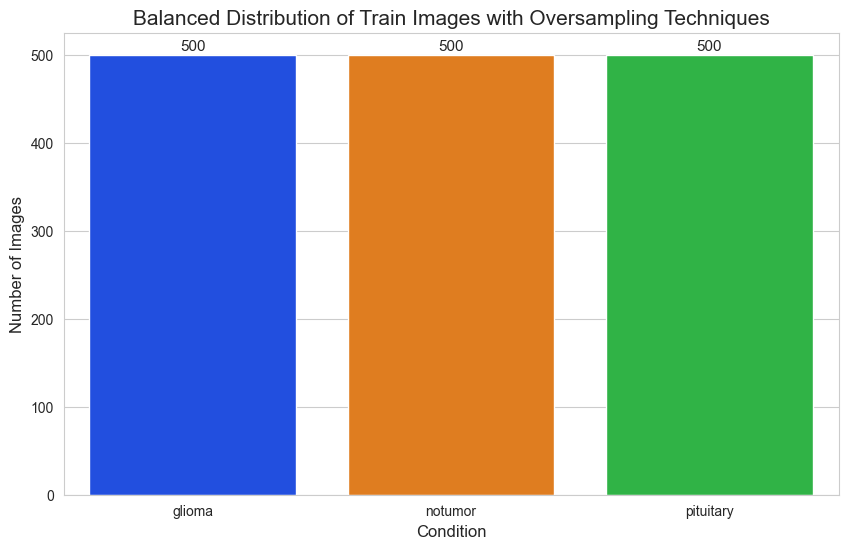

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Define your class counts (replace these with your actual counts)
class_counts = {
    'glioma': 500,
    'notumor': 500,
    'pituitary': 500
}

# Create DataFrame
df_train_gen = pd.DataFrame(list(class_counts.items()), columns=['Condition', 'Count'])
df_train_gen.index.name = 'Condition'

# Plot barplot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Condition', y='Count', data=df_train_gen, palette='bright')

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{int(height)}', ha='center', fontsize=11)

plt.xlabel("Condition", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Balanced Distribution of Train Images with Oversampling Techniques", fontsize=15)
plt.show()


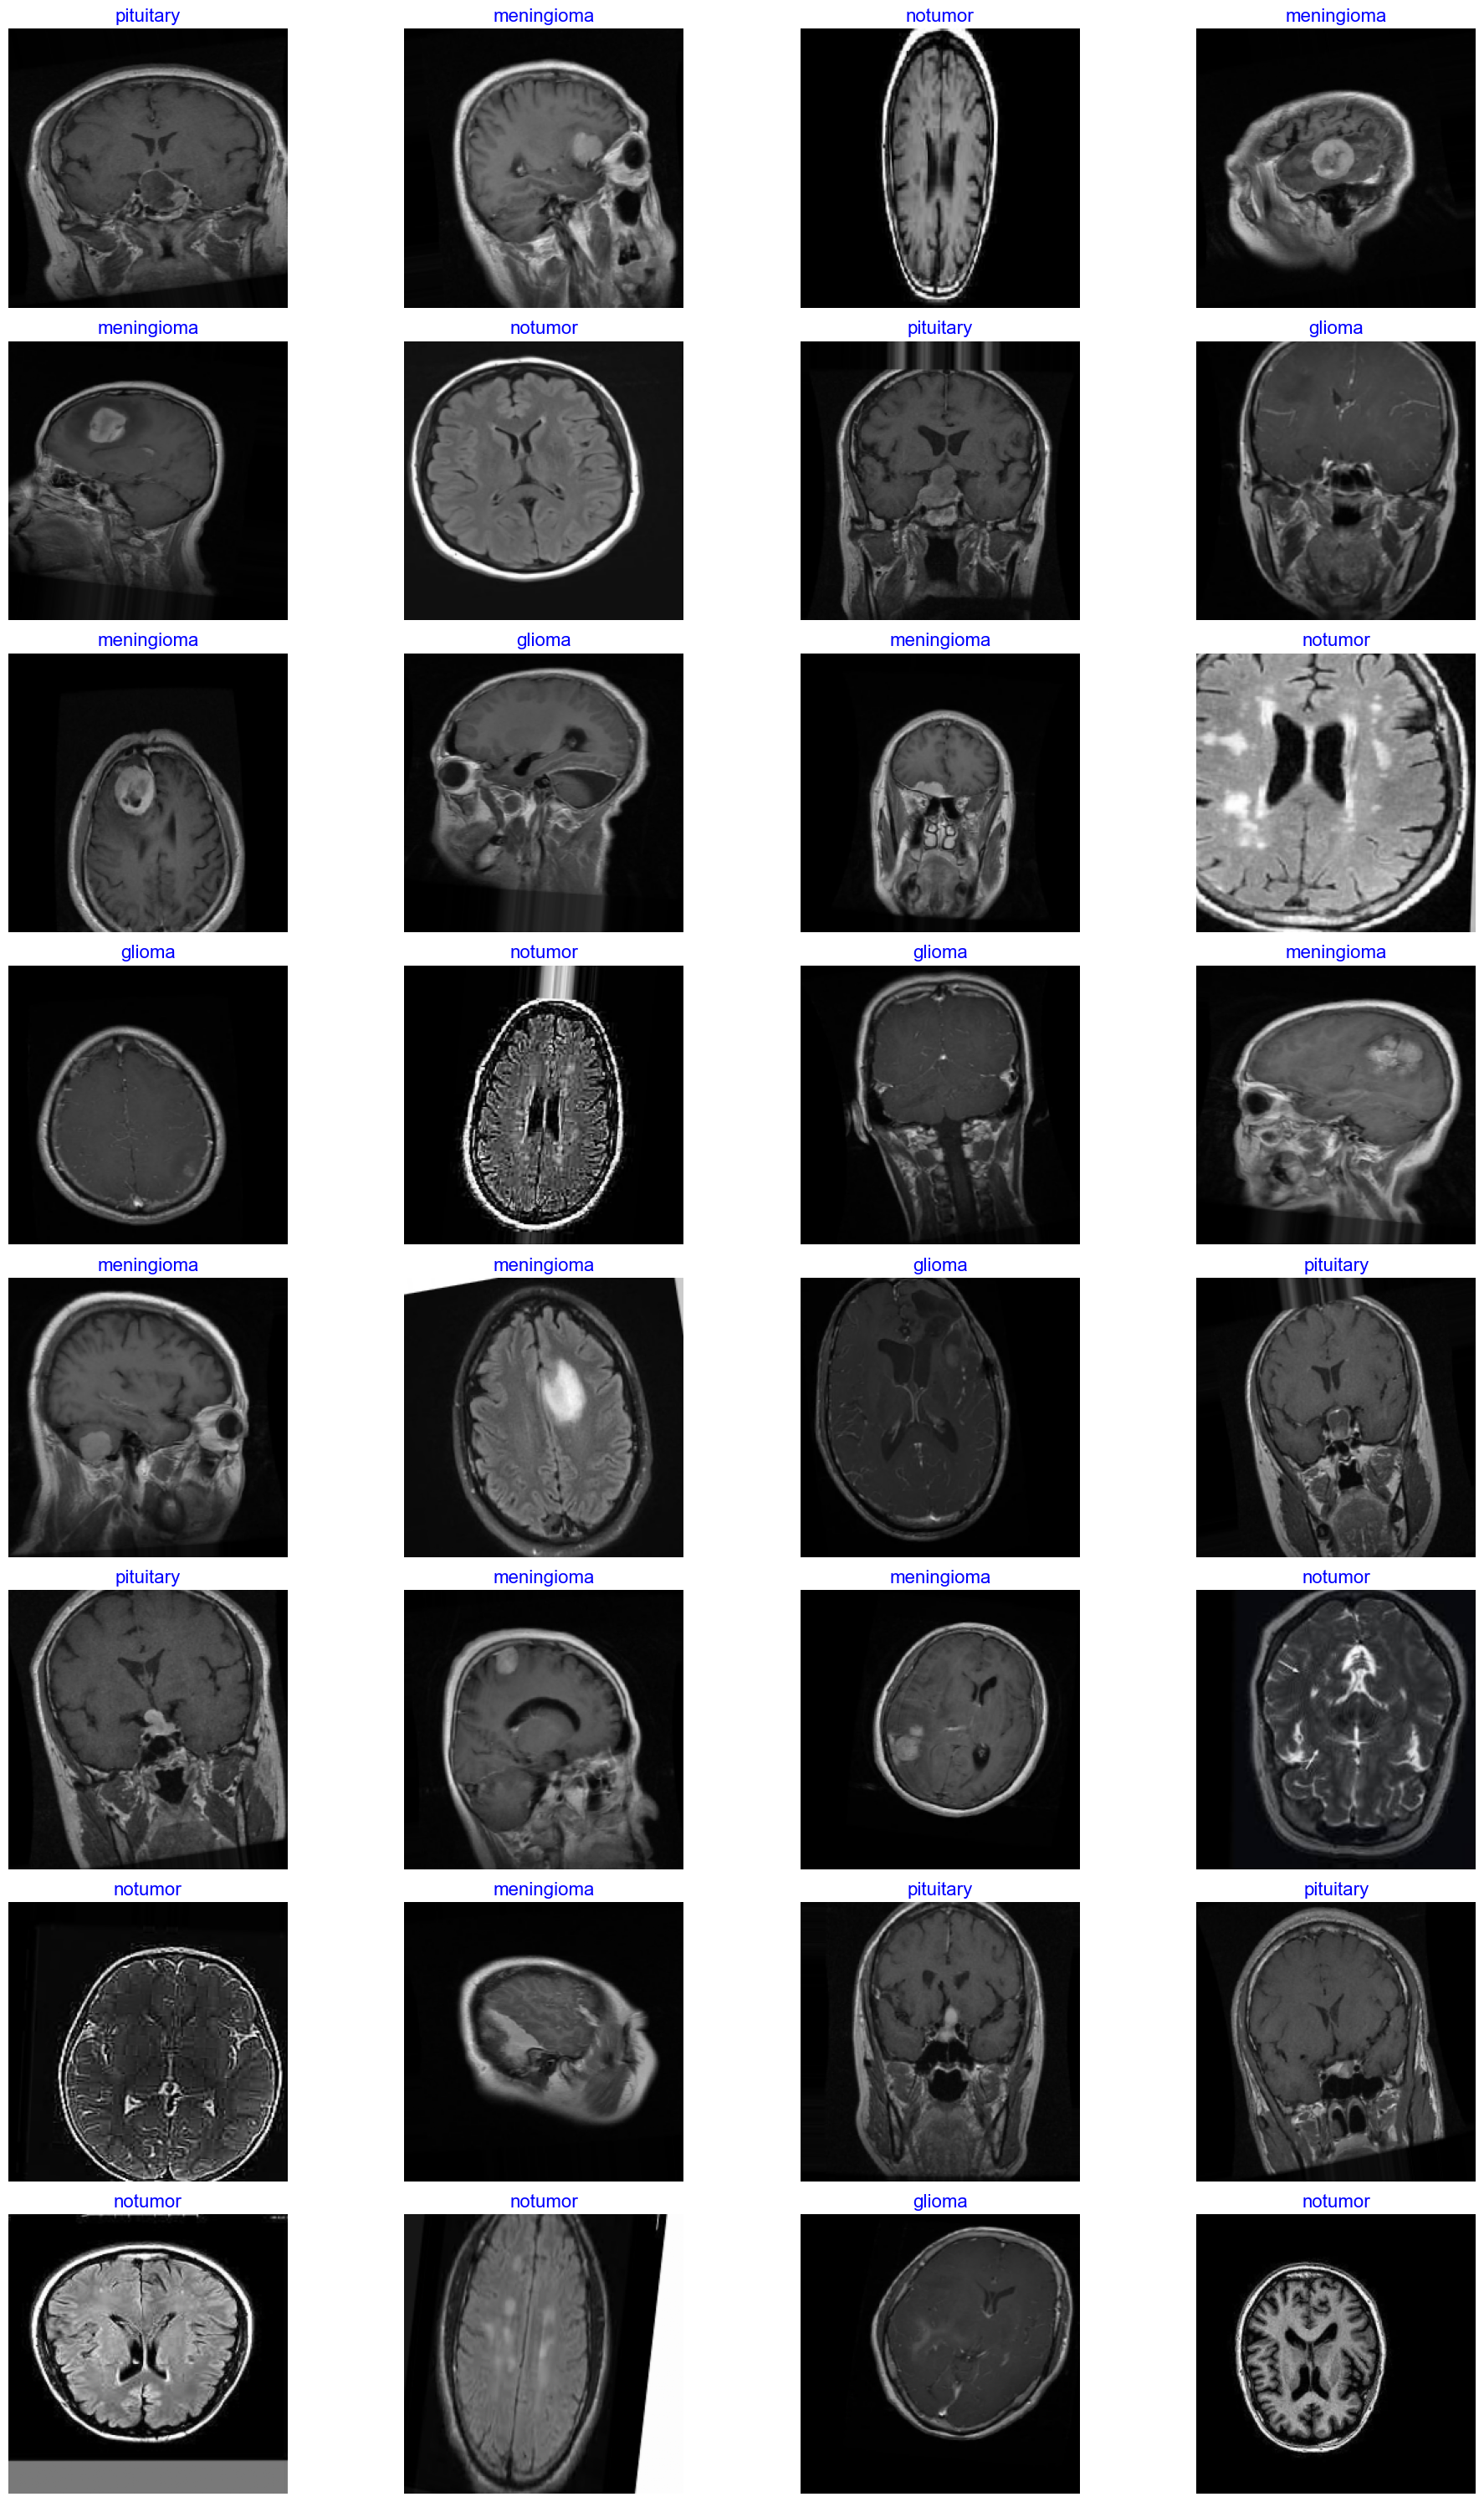

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def plotImageWithNames(gen):
    # Get one batch of images and labels
    images, labels = next(gen)
    filenames = gen.filenames
    classes = list(gen.class_indices.keys())
    
    plt.figure(figsize=(20, 30))
    length = len(labels)
    r = min(length, 32)  # show up to 32 images
    
    for i in range(r):
        plt.subplot(8, 4, i + 1)
        img = images[i] / 255.0  # normalize
        plt.imshow(img)
        index = np.argmax(labels[i])
        class_name = classes[index]
        filename = filenames[i]
        plt.title(f"{class_name}", color='blue', fontsize=16)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage
plotImageWithNames(train_generator)


## Model Development

In [48]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adam, Adamax

In [49]:
input_shape=(target_size[0], target_size[1], 3)
batch_size = batch_size
epochs=25
ask_epoch=15

## Model Building and Compiling

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax

# Define input shape and number of classes
input_shape = (224, 224, 3)   # Change if your images have a different size
class_count = 10              # Set this to match your dataset

# Define model name
model_name = 'EfficientNetB4'

# Load EfficientNetB4 base model
base_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights=None,
    input_shape=input_shape,
    pooling='max'
)

# Make base_model trainable
base_model.trainable = True

# Add custom layers on top
x = base_model.output
x = BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    name='batch_norm_x'
)(x)

x = Dense(
    1024,
    kernel_regularizer=regularizers.l2(0.016),  # fixed this line
    activity_regularizer=regularizers.l1(0.006),
    bias_regularizer=regularizers.l1(0.006),
    activation='relu',
    name='dense_x'
)(x)

x = Dropout(
    rate=0.5,
    seed=123,
    name='dropout_x'
)(x)

output = Dense(
    class_count,
    activation='softmax',
    name='dense_output'
)(x)

# Create the full model
cnn_model = Model(inputs=base_model.input, outputs=output, name=model_name)

# Compile the model
learning_rate = 0.001
cnn_model.compile(
    optimizer=Adamax(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
cnn_model.summary()

Model: "EfficientNetB4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_1[… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,152 │ block1a_se_excit… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         96 │ block1a_project_

 Total params: 19,527,273 (74.49 MB)

 Trainable params: 19,398,482 (74.00 MB)

 Non-trainable params: 128,791 (503.09 KB)

## Create a Custom Keras Callback to Continue or Halt Training

In [51]:
class ASK(tf.keras.callbacks.Callback):
    def _init_(self, epochs, ask_epoch):
        super(ASK, self)._init_()
        self.ask_epoch = ask_epoch
        self.epochs = epochs
        self.ask = True

    def on_train_begin(self, logs=None):
        if self.ask_epoch == 0:
            print('You set ask_epoch = 0, so it will be set to 1.')
            self.ask_epoch = 1
        if self.ask_epoch >= self.epochs:
            print(f'ask_epoch >= total epochs ({self.epochs}). No user input will be requested.')
            self.ask = False
        elif self.epochs == 1:
            self.ask = False
        else:
            print(f'Training will proceed until epoch {self.ask_epoch}, then prompt for input.')
            print('Enter H to halt or a number of extra epochs to continue training.')

        self.start_time = time.time()

    def on_train_end(self, logs=None):
        duration = time.time() - self.start_time
        hours = int(duration // 3600)
        minutes = int((duration % 3600) // 60)
        seconds = duration % 60
        print(f'Training time: {hours}h {minutes}m {seconds:.2f}s')

    def on_epoch_end(self, epoch, logs=None):
        if self.ask and (epoch + 1 == self.ask_epoch):
            print('\nEnter H to stop training or a number of extra epochs to continue:')
            ans = input().strip()
            if ans.lower() == 'h' or ans == '0':
                print(f'Stopping training at epoch {epoch + 1}.')
                self.model.stop_training = True
            else:
                try:
                    additional_epochs = int(ans)
                    self.ask_epoch += additional_epochs
                    if self.ask_epoch > self.epochs:
                        print(f'You requested to train beyond {self.epochs} epochs.')
                        print(f'Confirm to update total epochs to {self.ask_epoch} (Y/N):')
                        confirm = input().strip()
                        if confirm.lower() == 'y':
                            self.epochs = self.ask_epoch
                        else:
                            print(f'Reverting to original maximum of {self.epochs} epochs.')
                    else:
                        print(f'Training will now continue to epoch {self.ask_epoch}.')
                except ValueError:
                    print(f'Invalid input: "{ans}". No changes made.')

In [52]:
import time
from tensorflow import keras

class ASK(keras.callbacks.Callback):
    def _init_(self, model, epochs, ask_epoch):
        super(ASK, self)._init_()
        self.model = model
        self.ask_epoch = ask_epoch
        self.subask_epoch = int(ask_epoch / 2)
        self.epochs = epochs
        self.ask = True  # whether to query user at runtime

    def on_train_begin(self, logs=None):
        if self.ask_epoch == 0:
            print('You set ask_epoch = 0, it will be set to 1.', flush=True)
            self.ask_epoch = 1
        if self.ask_epoch >= self.epochs:
            print(f'ask_epoch >= epochs, will train for {self.epochs} epochs.', flush=True)
            self.ask = False
        if self.epochs == 1:
            self.ask = False
        else:
            print(f'Training will proceed until epoch {self.ask_epoch}, then you will be asked:')
            print('  Enter "H" to halt training or an integer to continue training for more epochs.')
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        if self.ask and (epoch + 1 == self.ask_epoch):
            print('\nEnter "H" to halt training or an integer for the number of additional epochs:')
            ans = input().strip()
            
            if ans.lower() == 'h' or ans == '0':
                print(f'You entered "{ans}". Training halted at epoch {epoch + 1} due to user input.\n', flush=True)
                self.model.stop_training = True
            else:
                try:
                    extra_epochs = int(ans)
                    self.ask_epoch += extra_epochs
                    if self.ask_epoch > self.epochs:
                        print(f'\nYou earlier specified a maximum of {self.epochs} epochs.')
                        print(f'It seems you now want to train for {self.ask_epoch} total epochs.')
                        print(f'Please confirm your action by entering "Y" to continue or "N" to end training at {self.epochs}.')
                        ans = input().strip()
                        if ans.lower() == 'y':
                            self.epochs = self.ask_epoch
                        else:
                            print(f'\nKeeping original max epochs = {self.epochs}. Training will stop at that point.', flush=True)
                    else:
                        print(f'You entered {extra_epochs}. Training will continue to epoch {self.ask_epoch}.', flush=True)
                except ValueError:
                    print('Invalid input. Expected "H" or an integer. Training will continue without changes.', flush=True)

    def on_train_end(self, logs=None):
        tr_duration = time.time() - self.start_time
        hours = int(tr_duration // 3600)
        minutes = int((tr_duration % 3600) // 60)
        seconds = tr_duration % 60
        msg = f'Training elapsed time: {hours}h {minutes}m {seconds:.2f}s'
        print(msg, flush=True)

# Checkpoint Callback

In [53]:
import tensorflow as tf

# ====================== CALLBACKS ======================

# Save only best weights
check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath=r"C:\Users\Abhis\Desktop\MRI IMAGE\best_model.weights.h5",  # ✅ must end with .weights.h5
    save_weights_only=True,
    save_best_only=True,
    monitor="val_accuracy",
    verbose=1
)

# Reduce learning rate on plateau
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.5,       # Reduce LR by 50% when plateau
    patience=2,
    verbose=1
)

# Early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.0005,
    patience=11,
    verbose=1,
    restore_best_weights=True
)

# Combine callbacks
callbacks = [check_point, reduce_learning, early_stop]


# Model Training

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r'C:\Users\Abhis\Desktop\MRI IMAGE\Training'
test_dir = r'C:\Users\Abhis\Desktop\MRI IMAGE\Testing'

# Define batch size
batch_size = 32

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [55]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Optional: freeze base model

# Build custom classifier head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation='softmax')(x)  # <- MATCH THIS TO YOUR NUMBER OF CLASSES

# Create the final model
cnn_model = models.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 207s 22us/step


In [56]:
print(train_generator.num_classes)

4


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # ✅ output layer
])

In [58]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [59]:
model_history = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=test_generator,  # use validation_data, not test_data
    validation_steps=test_generator.n // test_generator.batch_size
)


Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.5697 - loss: 3.9450
Epoch 1: val_accuracy improved from None to 0.85469, saving model to C:\Users\Abhis\Desktop\MRI IMAGE\best_model.weights.h5
178/178 ━━━━━━━━━━━━━━━━━━━━ 84s 463ms/step - accuracy: 0.7146 - loss: 1.5004 - val_accuracy: 0.8547 - val_loss: 0.3642 - learning_rate: 0.0010
Epoch 2/25
  1/178 ━━━━━━━━━━━━━━━━━━━━ 1:15 424ms/step - accuracy: 0.7188 - loss: 0.4649
Epoch 2: val_accuracy did not improve from 0.85469
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7188 - loss: 0.4649 - val_accuracy: 0.8516 - val_loss: 0.3513 - learning_rate: 0.0010
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9176 - loss: 0.2332
Epoch 3: val_accuracy improved from 0.85469 to 0.91875, saving model to C:\Users\Abhis\Desktop\MRI IMAGE\best_model.weights.h5
178/178 ━━━━━━━━━━━━━━━━━━━━ 89s 500ms/step - accuracy: 0.9290 - loss: 0.2146 - val_accuracy: 0.9187 - val_loss: 0.2114 - learning_rate: 0.0010
Ep

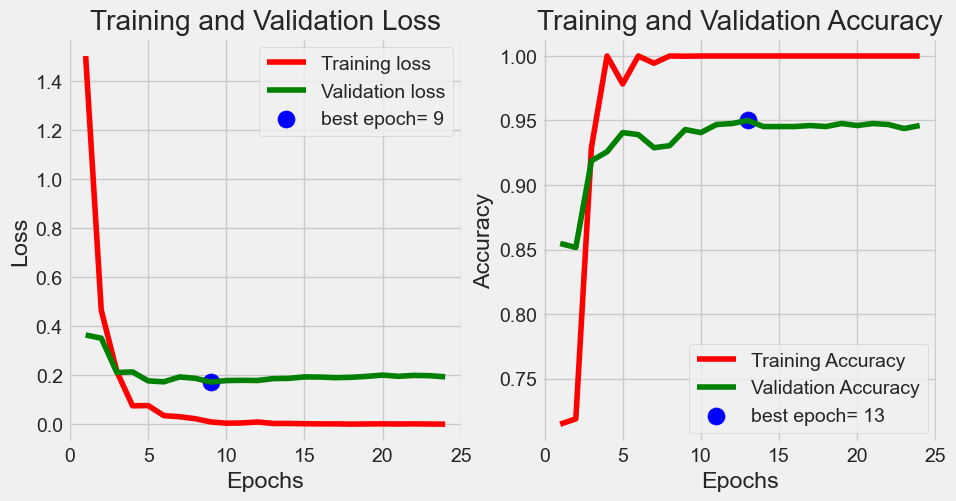

In [60]:
def trainValPlot(tr_data, start_epoch):
    # Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)   #   this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
trainValPlot(model_history,0)

In [61]:
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(train_generator, verbose=2)

179/179 - 26s - 143ms/step - accuracy: 1.0000 - loss: 0.0029


In [62]:
model = cnn_model

# Evaluate the model
loss, acc = model.evaluate(test_generator, verbose=2)

41/41 - 6s - 158ms/step - accuracy: 0.9489 - loss: 0.1858


In [63]:
def ModelPredictionOnTestDataset(test_generator, suffix='test'):
    # Calculate steps
    test_steps = test_generator.n // test_generator.batch_size

    # Predict
    preds = cnn_model.predict(test_generator, steps=test_steps, verbose=1)

    # Get predicted class indices
    predicted_classes = np.argmax(preds, axis=1)

    # Get true class indices
    true_classes = test_generator.classes

    # Labels
    class_labels = list(test_generator.class_indices.keys())

    # Count wrong predictions
    wrong_predictions = np.sum(predicted_classes != true_classes)
    total_predictions = len(true_classes)

    print(f'Total predictions: {total_predictions}')
    print(f'Wrong predictions: {wrong_predictions}')
    print(f'Accuracy on {suffix} set: {((total_predictions - wrong_predictions) / total_predictions) * 100:.2f}%')

    return wrong_predictions, total_predictions

In [64]:
import math
test_steps = math.ceil(test_generator.n / test_generator.batch_size)

In [65]:
#Verify Predictions

In [66]:
def compare(label_prep, gen=train_generator):
    class_dictionary = gen.class_indices
    for key, value in class_dictionary.items():
        if value == label_prep:
             return key

def dif(label_test, label_prep, gen=train_generator):    
    class_dictionary = gen.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == label_test:
            test = key
        if value == label_prep:
            id = key
    return test, id

# Verify the predicted images Function
def verifyPredictions(gentype = 'test'):
    if gentype.lower() == 'test' or gentype.lower() == 'validation':
        generator = ''
        if gentype.lower() == 'validation':
            generator = validation_generator
        else:
            generator = test_generator
            test_images, test_labels = next(generator)
        preds = cnn_model.predict(test_images)
        # One hot conversion
        label_prep = npy.argmax(preds, axis = 1)
        label_test = npy.argmax(test_labels, axis = 1)
        # Reshape
        label_prep = label_prep.reshape((-1, 1))
        label_test = npy.reshape(label_test, (len(label_test), 1))

        print(f"Batch prediction for {gentype} set: {npy.sum((label_test == label_prep)*1)/test_batch_size}\n")

        # Print the result
        fig = plt.figure(figsize=((20, 30)))
        for j in range(len(label_prep)):
            ax = plt.subplot(8, 4, j+1)
            px = test_images[j]/255
            ax.imshow(px)
            ax.set_xticks([])
            ax.set_yticks([])

            if label_test[j] == label_prep[j]:
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(10)
                    ax.spines[axis].set_color('green')
                ax.set_title(
                compare(label_prep[j]),
                            color='green', 
                            fontsize=20
                             )
            else:
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(10)
                    ax.spines[axis].set_color('red')
                ax.set_title(
                            'Pred:'+dif(label_test[j], label_prep[j])[1]+" | Act:"+ dif(label_test[j], label_prep[j])[0],
                            color='red', 
                            fontsize=20
                            )
            plt.tight_layout()

In [67]:
#Verify Predictions on Validation Images

In [68]:
def verifyPredictions(gentype='validation'):
    if gentype == 'validation':
        generator = test_generator
    #elif gentype == 'test':
        #generator = test_generator
    else:
        raise ValueError("gentype must be 'validation' or 'test'")

    test_images, test_labels = next(generator)  # Fetch a batch

    # Predict
    preds = cnn_model.predict(test_images)

    # Decode predictions
    predicted_labels = np.argmax(preds, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    print(f"Predicted labels: {predicted_labels}")
    print(f"True labels     : {true_labels}")

    # Accuracy of this batch
    accuracy = np.sum(predicted_labels == true_labels) / len(true_labels) * 100
    print(f"Batch Accuracy: {accuracy:.2f}%")

In [69]:
verifyPredictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted labels: [0 2 0 2 1 1 0 2 2 3 1 3 2 2 2 3 3 0 1 3 2 1 2 3 0 0 2 1 2 0 0 1]
True labels     : [0 2 0 2 1 1 0 2 2 3 1 3 2 2 2 3 3 1 1 3 2 0 2 3 0 0 2 1 2 0 0 1]
Batch Accuracy: 93.75%


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step
✅ Confusion Matrix:
[[ 74  73  88  65]
 [ 58  73 104  71]
 [ 83 103 119 100]
 [ 67  71  98  64]]


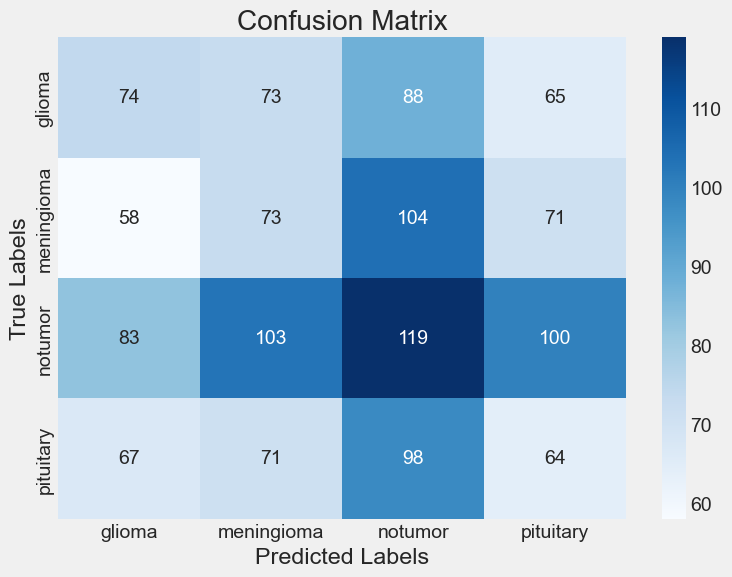


📊 Classification Report:
              precision    recall  f1-score   support

      glioma       0.26      0.25      0.25       300
  meningioma       0.23      0.24      0.23       306
     notumor       0.29      0.29      0.29       405
   pituitary       0.21      0.21      0.21       300

    accuracy                           0.25      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.25      0.25      0.25      1311



In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import os

# ✅ 1. Generate predictions on test set
test_predictions = cnn_model.predict(test_generator, verbose=1)

# ✅ 2. Get true labels from the test generator
test_labels_encoded = test_generator.classes

# ✅ 3. Get predicted class indices
predicted_classes = np.argmax(test_predictions, axis=1)

# ✅ 4. Confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, predicted_classes)
print("✅ Confusion Matrix:")
print(conf_matrix)

# ✅ 5. Class names (same order as generator)
class_names = list(test_generator.class_indices.keys())

# ✅ 6. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# ✅ 7. Print detailed classification report
print("\n📊 Classification Report:")
print(classification_report(test_labels_encoded, predicted_classes, target_names=class_names))


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax

# Define input shape and number of classes
input_shape = (224, 224, 3)
class_count = 10
model_name = 'EfficientNetB4'

# Load EfficientNetB4 base model
base_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights=None,
    input_shape=input_shape,
    pooling='max'
)

base_model.trainable = True

# Custom layers
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(1024,
          kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006),
          activation='relu')(x)
x = Dropout(rate=0.5, seed=123)(x)

output = Dense(class_count, activation='softmax')(x)

# Create model
cnn_model = Model(inputs=base_model.input, outputs=output, name=model_name)

# Compile model
cnn_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# SAVE MODEL
cnn_model.save("model.h5")

print("Model saved successfully!")


Model saved successfully!


In [76]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install streamlit tensorflow pillow numpy


Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adamax

# Define input shape and number of classes
input_shape = (224, 224, 3)
class_count = 10
model_name = 'EfficientNetB4'

# Load EfficientNetB4 base model
base_model = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights=None,
    input_shape=input_shape,
    pooling='max'
)

base_model.trainable = True

# Custom layers
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(1024,
          kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006),
          activation='relu')(x)
x = Dropout(rate=0.5, seed=123)(x)

output = Dense(class_count, activation='softmax')(x)

# Create model
cnn_model = Model(inputs=base_model.input, outputs=output, name=model_name)

# Compile model
cnn_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# SAVE MODEL
cnn_model.save("model.h5")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
!streamlit run app.py

In [ ]:
!streamlit run app.py